# 랜덤 포레스트를 이용한 feature importance 분석 코드!

***

## 1. baseline code (무시해도 됩니다)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('train.csv').drop(columns=['ID'])
test = pd.read_csv('test.csv').drop(columns=['ID'])
X = train.drop('임신 성공 여부', axis=1) # input
y = train['임신 성공 여부'] # target
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

# 6. 범주의 정수화 (by sklearn 전처리)   
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# test encoding 시 기존에 없던 범주를 발견하면 -1로 처리

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

## 2. 데이터 정규화

In [3]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_train_encoded)

# 변환된 데이터로 DataFrame 생성
normalized_df = pd.DataFrame(normalized_data, columns=X_train_encoded.columns)

## 3. 학습 및 중요도 정리

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(normalized_df, y)


# 중요도 정리
importance_df = pd.DataFrame({
    'Feature': normalized_df.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)  # 중요도 순으로 정렬

## 4. plot 그리기

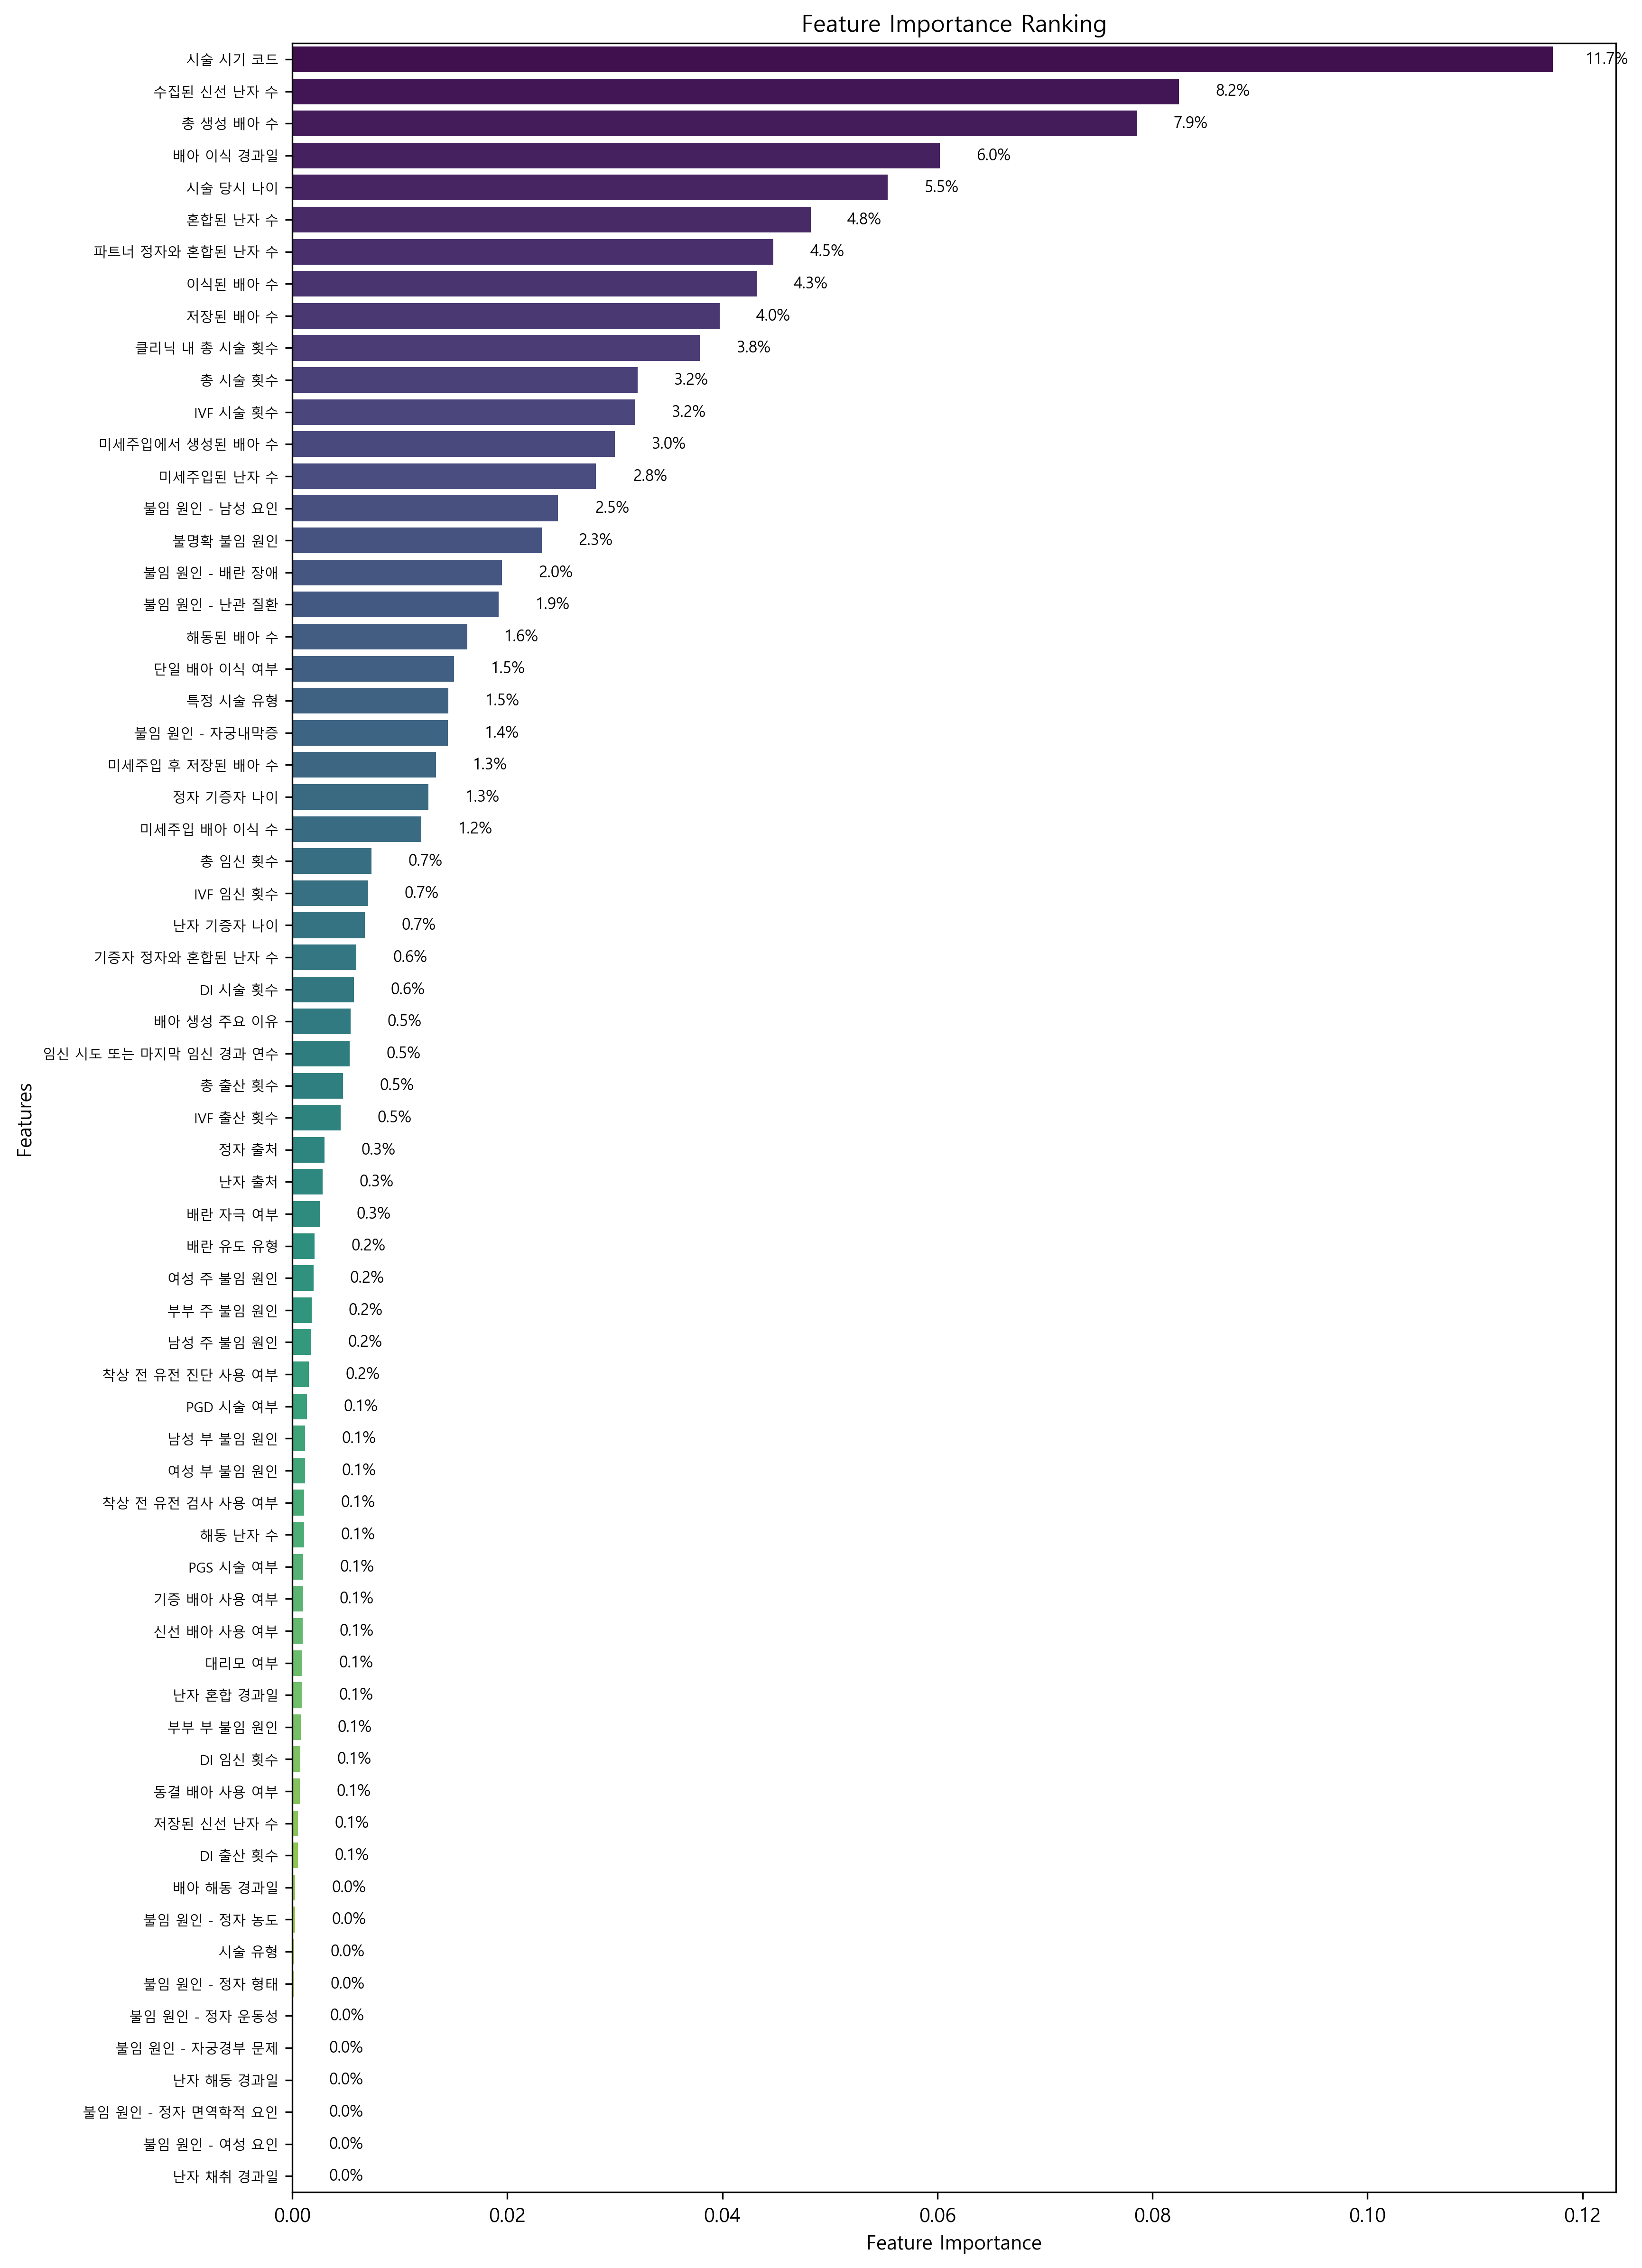

In [5]:
# 중요도 높은 순으로 정렬
plt.figure(figsize=(12, 20), dpi=300)
ax = sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')

# 백분율로 수치 표시
for p in ax.patches:
    width = p.get_width()  # 막대의 너비 (중요도)
    ax.text(width + 0.005, p.get_y() + p.get_height() / 2, 
            f'{width*100:.1f}%',  # 백분율로 표시
            ha='center', va='center', fontsize=8, color='black')

plt.xlabel("Feature Importance")
plt.ylabel("Features")

plt.yticks(fontsize=7)

plt.title("Feature Importance Ranking")
plt.show()